In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-1e4a0b7ca604>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("BSESENSEX.csv")
df.head()

,Date,Open,High,Low,Close
8-April-2020,29701.92,31227.97,29602.94,29893.96,NaN
9-April-2020,30571.19,31225.20,30420.22,31159.62,NaN
13-April-2020,31195.72,31195.72,30474.15,30690.02,NaN
15-April-2020,31277.11,31568.36,30222.07,30379.81,NaN
16-April-2020,30095.51,30800.20,30016.17,30602.61,NaN


In [5]:
print(df.head())

                   Date      Open      High       Low  Close
8-April-2020   29701.92  31227.97  29602.94  29893.96    NaN
9-April-2020   30571.19  31225.20  30420.22  31159.62    NaN
13-April-2020  31195.72  31195.72  30474.15  30690.02    NaN
15-April-2020  31277.11  31568.36  30222.07  30379.81    NaN
16-April-2020  30095.51  30800.20  30016.17  30602.61    NaN


In [6]:
print(df.shape)

(250, 5)


In [7]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


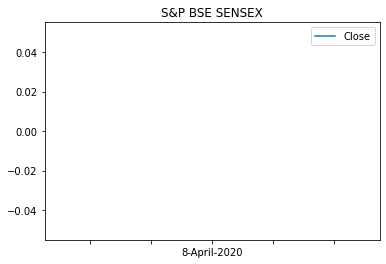

In [8]:
df[['Close']].plot()
plt.title("S&P BSE SENSEX")
plt.show()

Text(0.5, 1.0, 'S&P BSE SENSEX')

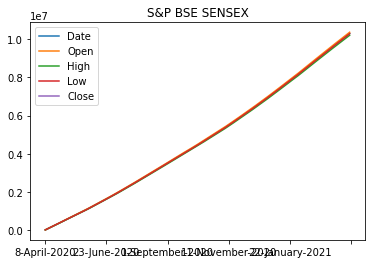

In [10]:
dr = df.cumsum()
dr.plot()
plt.title('S&P BSE SENSEX')

Text(0.5, 1.0, 'S&P BSE SENSEX Autocorrelation plot')

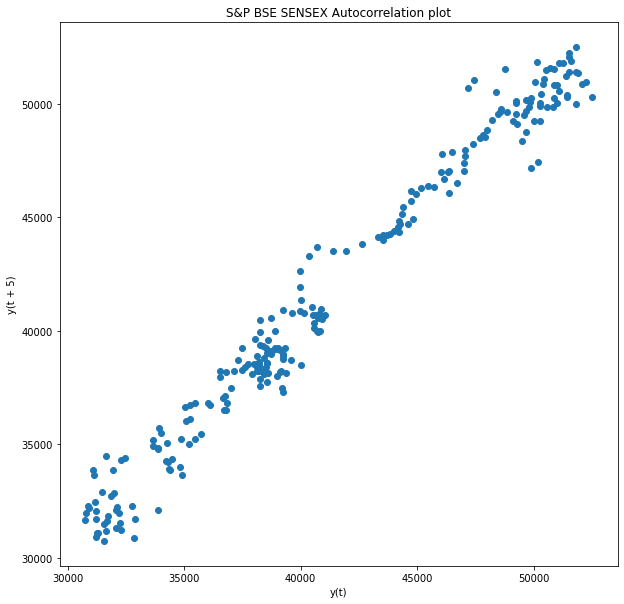

In [12]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('S&P BSE SENSEX Autocorrelation plot')

In [16]:
df['Date'][249]

49277.09

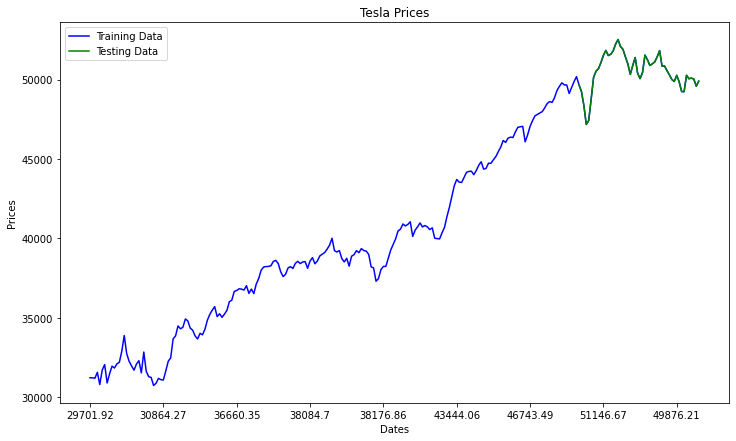

In [17]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,249, 30), df['Date'][0:249:30])
plt.legend()

In [18]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [19]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 342865.740
Symmetric mean absolute percentage error: 2.464


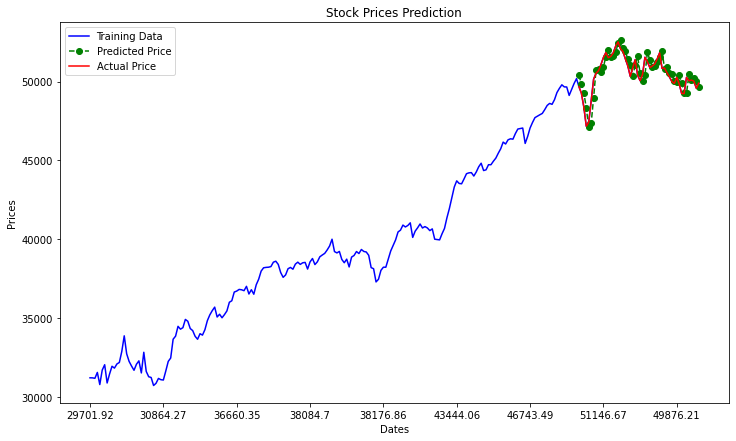

In [21]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Stock Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,249, 30), df['Date'][0:249:30])
plt.legend()

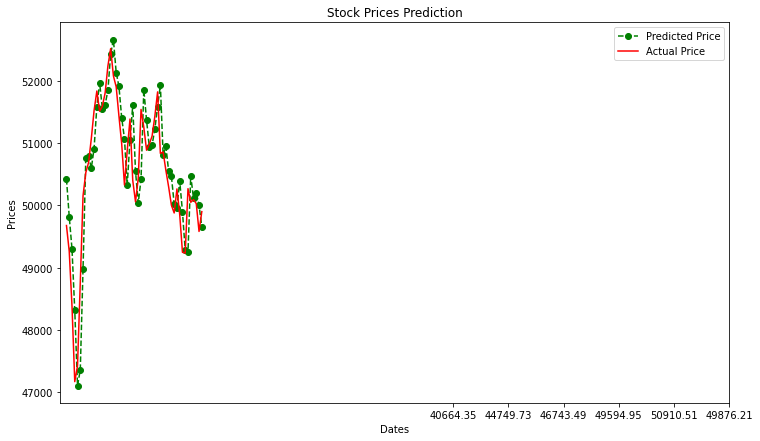

In [22]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(140,249, 20), df['Date'][140:249:20])
plt.title('Stock Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()